<b>Описание проекта</b>  
Заказчик этого исследования — Министерство культуры Российской Федерации.  
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.  
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.  

    
<b>Шаг 1. Импорт данных и объединение их в один датафрейм </b>
- [ ] Импорт данных
- [ ] Объедините таблиц 
- [ ] Проверка результатов объединения на корректность

<b>Шаг 2. Предобработка данных </b>
- [ ] Проверка типов данных в датафрейме и преобразование там, где это необходимо
- [ ] Изучение пропусков в датафрейме
- [ ] Проверка, есть ли в данных дубликаты
- [ ] Изучение столбцов, которые содержат категориальные значения:
    - [ ] Какая общая проблема встречается почти во всех категориальных столбцах?
    - [ ] Исправление проблемных значений в поле type.
    - [ ] Изучение столбцов, которые хранят количественные значения.
- [ ] Добавление новых столбцов:
    - [ ] Создание столбца с информацией о годе проката. Выделение года из даты премьеры фильма.
    - [ ] Создание двух столбцов: с именем и фамилией главного режиссёра и основным жанром фильма.
    - [ ] Посчет доли государственной поддержки от общего бюджета фильма.
    
<b>Шаг 3. Проведем исследовательский анализ данных</b>
- [ ] Посмотрим, сколько фильмов выходило в прокат каждый год. 
- [ ] Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. 
- [ ] Проанализируем, как эта доля менялась по годам. 
- [ ] Сделаем вывод о том, какой период полнее всего представлен в данных.
- [ ] Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
- [ ] С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года. Сравним значения и сделаем выводы.
- [ ] Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

<b>Шаг 4. Исследование фильмов, которые получили государственную поддержку</b>
- [ ] На этом этапе нет конкретных инструкций и заданий — ищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

<b>Шаг 5. Написание общего вывода</b>

<b>Описание данных</b>  
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.  
title — название фильма;  
puNumber — номер прокатного удостоверения;  
show_start_date — дата премьеры фильма;  
type — тип фильма;  
film_studio — студия-производитель;  
production_country — страна-производитель;  
director — режиссёр;  
producer — продюсер;  
age_restriction — возрастная категория;  
refundable_support — объём возвратных средств государственной поддержки;  
nonrefundable_support — объём невозвратных средств государственной поддержки;  
financing_source — источник государственного финансирования;  
budget — общий бюджет фильма;  
ratings — рейтинг фильма на КиноПоиске;  
genres — жанр фильма.  
Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.  
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.  
puNumber — номер прокатного удостоверения;  
box_office — сборы в рублях.  

1. [Предобработка](#preprocessing)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Откроем два датафрема и посмотрим информацию о них.

In [3]:
df_1 = pd.read_csv('/datasets/mkrf_movies.csv')
df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df_2 = pd.read_csv('/datasets/mkrf_shows.csv')
df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Для объединения двух датафреймов мы будем использовать объединение по столбцу puNumber, однако для начала необходимо привести их к одинаковому типу.

In [5]:
#df_1['puNumber'] = df_1['puNumber'].astype('int') - получаем ValueError: invalid literal for int() with base 10: 'нет'

Получаем ошибку и невозможность привести значения столбца puNumber к типу int из-за значения 'нет'. Заменим его на ноль.

In [7]:
df_1['puNumber'] = df_1['puNumber'].replace('нет', '0')
df_1['puNumber'] = df_1['puNumber'].astype('int')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Замена значения на ноль повлияло на благополучную замену типа всего столбца. Пора объединять таблицы.

In [8]:
df = df_1.merge(df_2, on='puNumber', how='outer')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Объединение таблиц прошло успешно, общее количество строк осталось без изменений - 7 486.

<a id="preprocessing"> </a>
### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Заменим типы следующих столбцов:  
show_start_date на datetime  
ratings на float  

In [9]:
#Изменим тип столбца с датой в формат даты 
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')
df.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


In [10]:
#Изменим тип столбца ratings на float  
#df['ratings'].unique()
df['ratings'] = df['ratings'].replace('99%','9.9')
df['ratings'] = df['ratings'].replace('28%','2.8')
df['ratings'] = df['ratings'].replace('97%','9.7')
df['ratings'] = df['ratings'].replace('83%','8.3')
df['ratings'] = df['ratings'].replace('64%','6.4')
df['ratings'] = df['ratings'].replace('91%','9.1')
df['ratings'] = df['ratings'].replace('94%','9.4')
df['ratings'] = df['ratings'].replace('62%','6.2')
df['ratings'] = df['ratings'].replace('79%','7.9')
df['ratings'] = df['ratings'].replace('90%','9.0')
df['ratings'] = df['ratings'].replace('19%','1.9')
df['ratings'] = df['ratings'].replace('88%','8.8')
df['ratings'] = df['ratings'].replace('89%','8.9')
df['ratings'] = df['ratings'].replace('98%','9.8')
df['ratings'] = df['ratings'].astype('float')
df['ratings'].unique() #Проверим уникальные значения
df.info() #Проверим изменение типа данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [11]:
pd.Series(['56%', 5.5]).astype('str').str.replace('%','e-1').astype(float)

0    5.6
1    5.5
dtype: float64

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [12]:
#Проверим колличество пропусков в %
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


В столбцах refundable_support, nonrefundable_support, budget, financing_source пропуски вызваны отсутсвием государственной поддержки, оставим без изменений.  
В столбцах ratings, genres, producer пропцски не превышают 13% от общего количества, не считаю нужным их заполнять.  
В столбце box_office пропуски указаны в фильмах, которые не вошли в таблицу сборов.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [13]:
df.duplicated().sum()

0

Явных дубликатов нет. Поищем неявные.

In [14]:
df.duplicated(subset=['title', 'director'], keep='first')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Видим повторяющиеся строки с одинаковым названием фильма и одним и тем же режиссером (например строки 3 и 4). Можно сгуппировать таблицу по таким фильмам, если прокаты были в одном году, а бюджеты и сборы таких строк объеденить. Сделаем это на этапе создания отдельного столбца с годом проката, чтобы объеденить данные о прокате фильма в один год.

In [15]:
df[df.duplicated(subset=['puNumber'], keep='first')].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [16]:
df.query('puNumber == 221154310 or puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Первый и второй фильмы разные, но имеют одинаковый номер прокатных удостоверений - 221154310. Какой-то номер ошибочный, удалять эти строки нельзя.

Третий и четвертый фильмы тоже разные, но с одинаковым прокатным удостоверением 221054410. Опятьмы наблюдаем ошибку, удалять эти строки нельзя.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [17]:
df.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    742
box_office               2938
dtype: int64

In [18]:
df['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [19]:
df['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                                                                                     341
ООО "Мульт в кино"                                                                                                                                                                         57
Анимаккорд Лтд                                                                                                                                                                             23
ООО "Мульт в кино"                                                                                                                                                                         18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                                                                                     16
                                                  

In [20]:
df['production_country'].value_counts()

США                                                           2172
Россия                                                        1821
СССР                                                           347
Франция                                                        301
Великобритания                                                 257
                                                              ... 
Таиланд-Великобритания-Франция-Германия-Испания-Нидерланды       1
США - Канада - КНР                                               1
Великобритания - Испания - Германия                              1
Нидерланды - Россия - Германия                                   1
Канада-Великобритания                                            1
Name: production_country, Length: 950, dtype: int64

In [21]:
df['genres'].value_counts()

драма                         476
комедия                       352
мелодрама,комедия             222
драма,мелодрама,комедия       189
драма,мелодрама               183
                             ... 
реальное ТВ                     1
боевик,военный,драма            1
спорт,мелодрама,криминал        1
биография,криминал,драма        1
фантастика,боевик,криминал      1
Name: genres, Length: 742, dtype: int64

In [22]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [23]:
df['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [24]:
df['type'] = df['type'].str.lower().str.strip()
df['film_studio'] = df['film_studio'].str.lower().str.strip()
df['production_country'] = df['production_country'].str.lower().str.strip()
df['genres'] = df['genres'].str.lower().str.strip()
df['age_restriction'] = df['age_restriction'].str.lower().str.strip()
df['financing_source'] = df['financing_source'].str.lower().str.strip()

In [25]:
demo = df['film_studio'].str.extract('(^\W)|(\W$)')
demo[0].dropna().unique(),  demo[1].dropna().unique()

(array(['"'], dtype=object),
 array(['"', ')', '+', '.', ',', '»'], dtype=object))

In [26]:
df.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        6
film_studio              5422
production_country        933
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    742
box_office               2938
dtype: int64

Выявлена общая проблема в столбцах с категориальными значениями. Она связана с лишними знаками препинания и пробелами, разный регистр и сокращённые имена режисёров.  

Чтобы привести данные в правильный для анализа формат мы удалили лишние знаки препинания, пробелы и привели к нижнему регистру нуждающиеся в этом столбцы.  

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [27]:
df['puNumber'].value_counts()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: puNumber, Length: 7484, dtype: int64

В столбце 'puNumber' подозрительные данныене обнаружены. Одному прокатному номеру соответствует одна строка датафрейма. Лишь у одного фильма нет прокатного номера.

In [28]:
df['refundable_support'].value_counts()

0.0            221
20000000.0      12
10000000.0      10
25000000.0      10
15000000.0       9
5000000.0        9
50000000.0       8
40000000.0       8
30000000.0       7
60000000.0       6
100000000.0      5
110000000.0      2
55000000.0       2
19000000.0       2
75000000.0       2
7153119.0        1
35000000.0       1
9000000.0        1
150000000.0      1
36000000.0       1
29000000.0       1
17000000.0       1
180000000.0      1
115000000.0      1
41000000.0       1
26000000.0       1
7000000.0        1
7346881.0        1
3500000.0        1
8000000.0        1
38000000.0       1
44000000.0       1
28000000.0       1
80000000.0       1
Name: refundable_support, dtype: int64

БОльшая доля значений в столбце 'refundable_support' приходится на ноль, что означает, что фильмы получали госфинансирование на невозвратной основе.

In [29]:
df['nonrefundable_support'].value_counts()

25000000.0     53
30000000.0     48
35000000.0     29
40000000.0     26
20000000.0     19
               ..
31000000.0      1
29000000.0      1
138969465.0     1
3000000.0       1
25900000.0      1
Name: nonrefundable_support, Length: 75, dtype: int64

В столбце 'nonrefundable_support' наблюдаем похожую ситуацию.

In [30]:
df['budget'].isna().sum()

7154

Согласно заданию, в столбце 'budget' хранятся данные о бюджетах только тех фильмов, что получали господдержку. Соответственно, здесь представлены те же самые строки, что и в refundable_support и nonrefundable_support.

In [31]:
df.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ооо киностудия ""сентябрь""",россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"министерство культуры, фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,"ооо ""кинофирма""",россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,фонд кино,5.6,фантастика,1.038321e+09


Заполнить пропуски в обнаруженных 17 строках с нулевым бюджетом мы можем суммой возвратных и невозвратных средств государственной поддержки.

In [32]:
df.loc[df['budget'] == 0.0, 'budget'] = df['refundable_support']+df['nonrefundable_support']

Проверим заполнение нулевых значений.

In [33]:
df.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [34]:
#df.loc[df['budget'] == 0] = None

In [35]:
df['budget'].isna().sum()

7154

Посмотрим на распределение значений в столбце box_office с помощью гистограммы. 

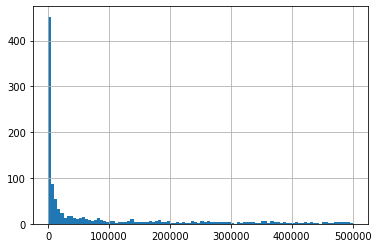

In [36]:
df['box_office'].hist(bins=100, range=(0, 500000))
plt.show()

Обнаружили много фильмов с небольшими сборами. Ничего с этим делать не будем, может и правда фильм оказался не очень, что часто бывает.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [37]:
df['show_start_year'] = df['show_start_date'].dt.year
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [38]:
def get_first_value(s, sep = ','):
    value_lst = s.split(sep=sep)
    return value_lst[0]

In [39]:
#df['main_director'] = df['director'].apply(get_first_value)
df['main_director'] = df['director'].str.split(',').str[0]

In [40]:
df['main_genre'] = df['genres'].str.split(',').str[0]

In [41]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Чтобы подсчитать долю поддержки от общего бюджета сложим значения refundable_support и nonrefundable_support и разделим их на budget.

In [42]:
df['gos_share'] = ((df['refundable_support'] + df['nonrefundable_support']) / df['budget'])*100

In [43]:
df['gos_share'].describe()

count    332.000000
mean      54.209799
std       19.692515
min        4.404305
25%       38.461538
50%       61.403763
75%       66.141160
max      100.000000
Name: gos_share, dtype: float64

In [44]:
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,gos_share
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


Требуемые ТЗ столбцы добавлены.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [45]:
df_prokat = df.pivot_table(index='show_start_year', values=('title','box_office'), aggfunc ='count')
df_prokat['share'] = (df_prokat['box_office'] / df_prokat['title'])*100
df_prokat

,box_office,title,share
show_start_year,,,
2010,105,985,10.659898
2011,109,622,17.524116
2012,128,593,21.585160
2013,184,630,29.206349
2014,279,807,34.572491
2015,465,705,65.957447
2016,526,818,64.303178
2017,357,505,70.693069
2018,475,891,53.310887


Доля сборов с годами растёт. Однако наблюдается спад сборов в 2018 и 2019 годах.

In [46]:
df.groupby('show_start_year').agg(title_count=('title','count'),
                                  box_office_count=('box_office','count'),
                                  box_share=('box_office', lambda x : x.isna().mean()))\
                             .style.format({'box_share' : '{:.0%}'})

,title_count,box_office_count,box_share
show_start_year,,,
2010,985,105,89%
2011,622,109,82%
2012,593,128,78%
2013,630,184,71%
2014,807,279,65%
2015,705,465,34%
2016,818,526,36%
2017,505,357,29%
2018,891,475,47%


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:xlabel='show_start_year'>

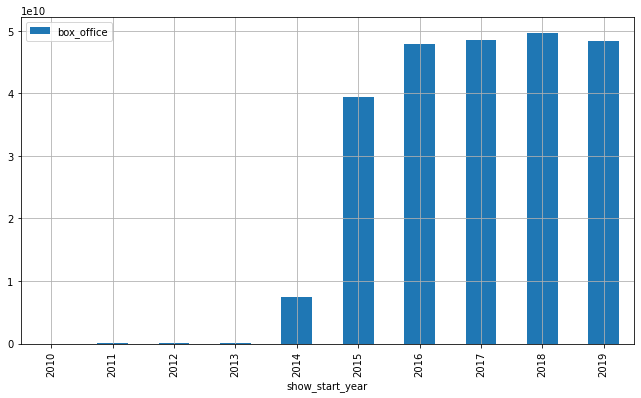

In [47]:
df_prokat_year = df.pivot_table(index='show_start_year', values='box_office', aggfunc ='sum')
df_prokat_year
df_prokat_year.plot(kind='bar',grid=True, figsize=(11,6))

In [64]:
df_prokat_year.style.format('{:,.0f}').highlight_min(color='lime').highlight_max(color='orange')

,box_office
show_start_year,
2010,"2,428,654"
2011,"14,102,765"
2012,"6,955,423"
2013,"29,799,706"
2014,"7,444,951,859"
2015,"39,497,365,196"
2016,"47,866,299,742"
2017,"48,563,707,218"
2018,"49,668,403,134"


С годами количество прокатов растёт. Исключением является спад в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

<AxesSubplot:xlabel='show_start_year'>

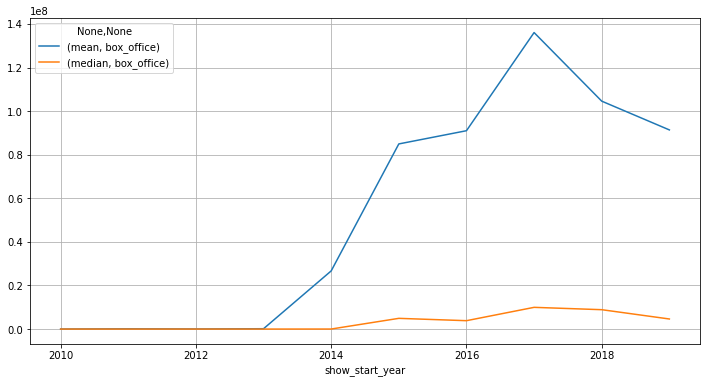

In [49]:
df.pivot_table(index = 'show_start_year', values= 'box_office', aggfunc = ['mean','median']).plot(
    kind='line',
    grid=True, 
    figsize=(12, 6),
)

Медиана выглядит относительно ровной. Среднее значение резко растёт в 2013 году и достигает пика в 2017 году, а далее постепенно снижается. Отображённая разница в значениях средней и медианы скорее всего вызвана отсутствием информации о сборах по многим фильмам или наличием большого количества фильмов с небольшой суммой сборов.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:xlabel='show_start_year'>

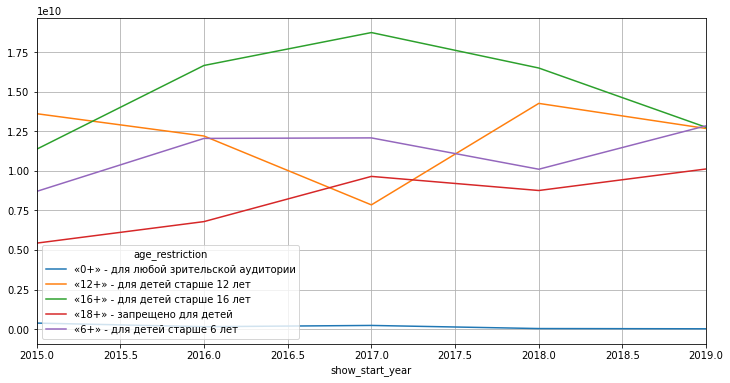

In [50]:
df.pivot_table(index = 'show_start_year', columns='age_restriction', values= 'box_office', aggfunc = 'sum').plot(
    kind='line',
    grid=True, 
    figsize=(12, 6),
    xlim = [2015,2019]
)

На графике можем наблюдать влияние возрастного ограничения на кассовые сборы. Больше всех собирают фильмы с ограничением 16+,12+,6+. Меньше всех собирают фильмы с ограничениями 0+ и 18+.

<AxesSubplot:xlabel='show_start_year'>

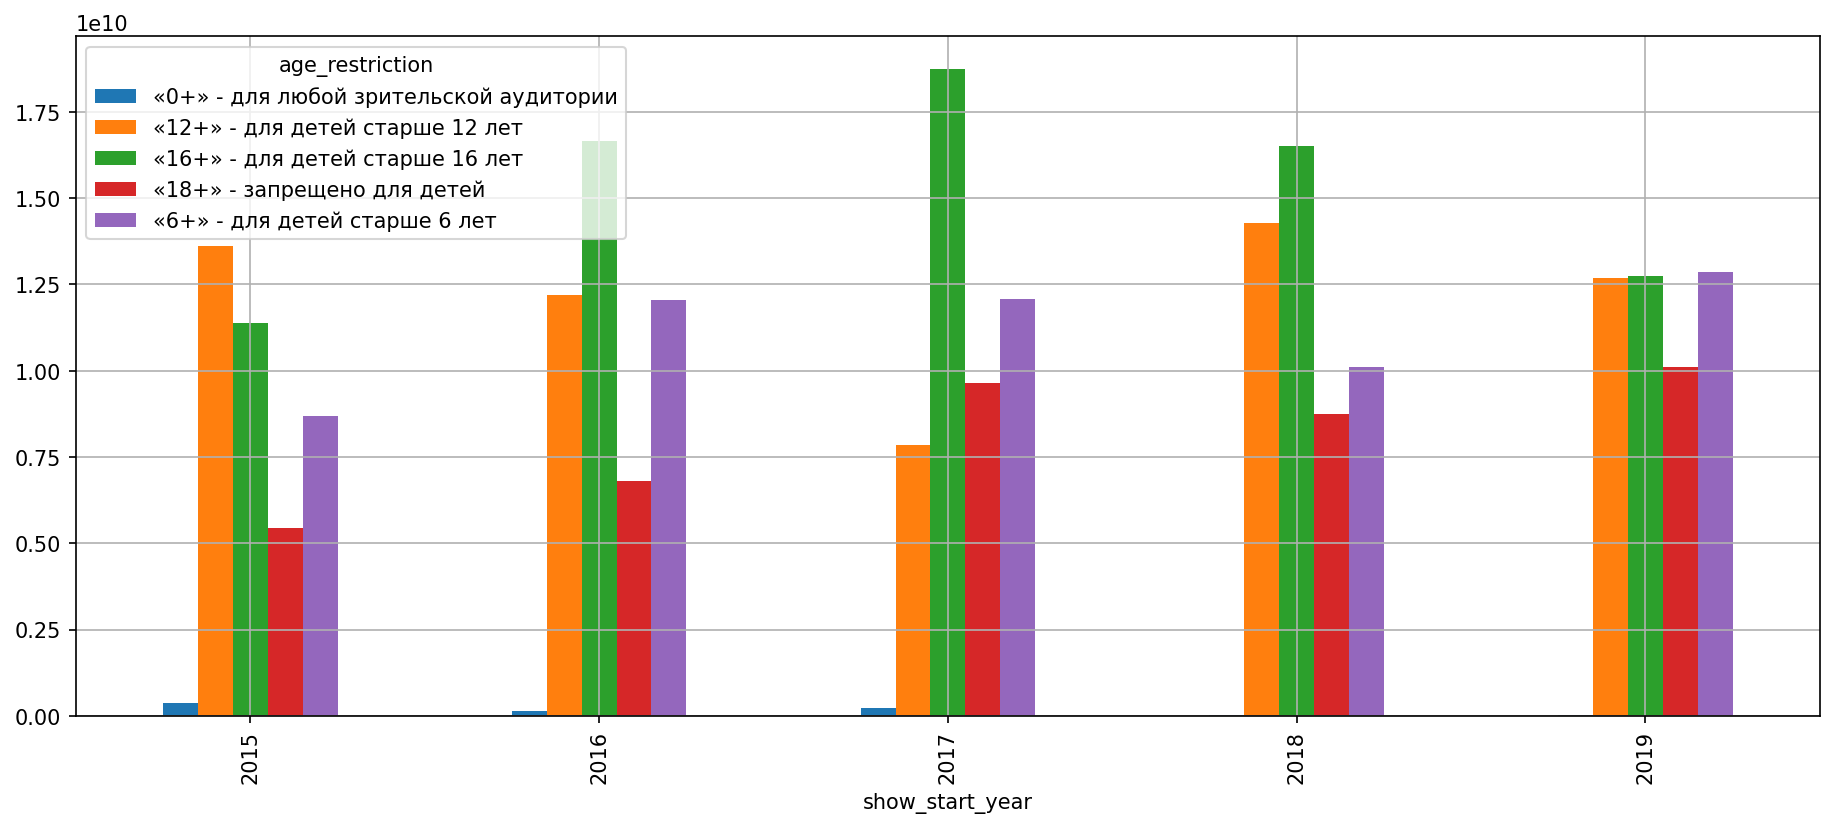

In [51]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,6), dpi=150)

df[df['show_start_year'] >= 2015].pivot_table(index = 'show_start_year', columns='age_restriction', values= 'box_office', aggfunc = 'sum').plot(
    kind='bar',
    grid=True, 
    ax=ax
)



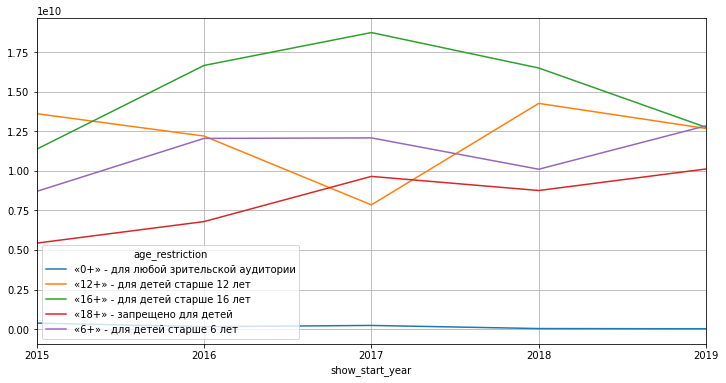

In [52]:
ax = df.pivot_table(index = 'show_start_year', columns='age_restriction', values= 'box_office', aggfunc = 'sum').plot(
    kind='line',
    grid=True, 
    figsize=(12, 6),
    xlim = [2015,2019]
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Рассмотрим число фильмов, которые снимаются на бюджетные деньги.

In [53]:
df['budget_support'] = df['refundable_support'] + df['nonrefundable_support']
# Создадим новый столбец 'budget_support' с информацией об итоговой сумме госфинансирования

<AxesSubplot:xlabel='main_genre'>

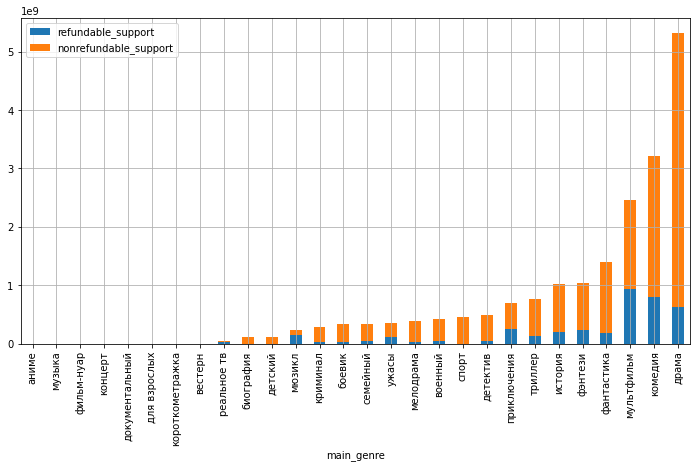

In [54]:
df.groupby('main_genre').agg('sum').sort_values(by='budget_support').plot(
    kind='bar',
    grid=True, 
    figsize=(12, 6),
    stacked=True,
    y=['refundable_support', 'nonrefundable_support'],
)

Фильмов с невозвратной поддержкой гораздо больше, чем с возвратной. Исключением являются мюзиклы, но их в целом не так много.

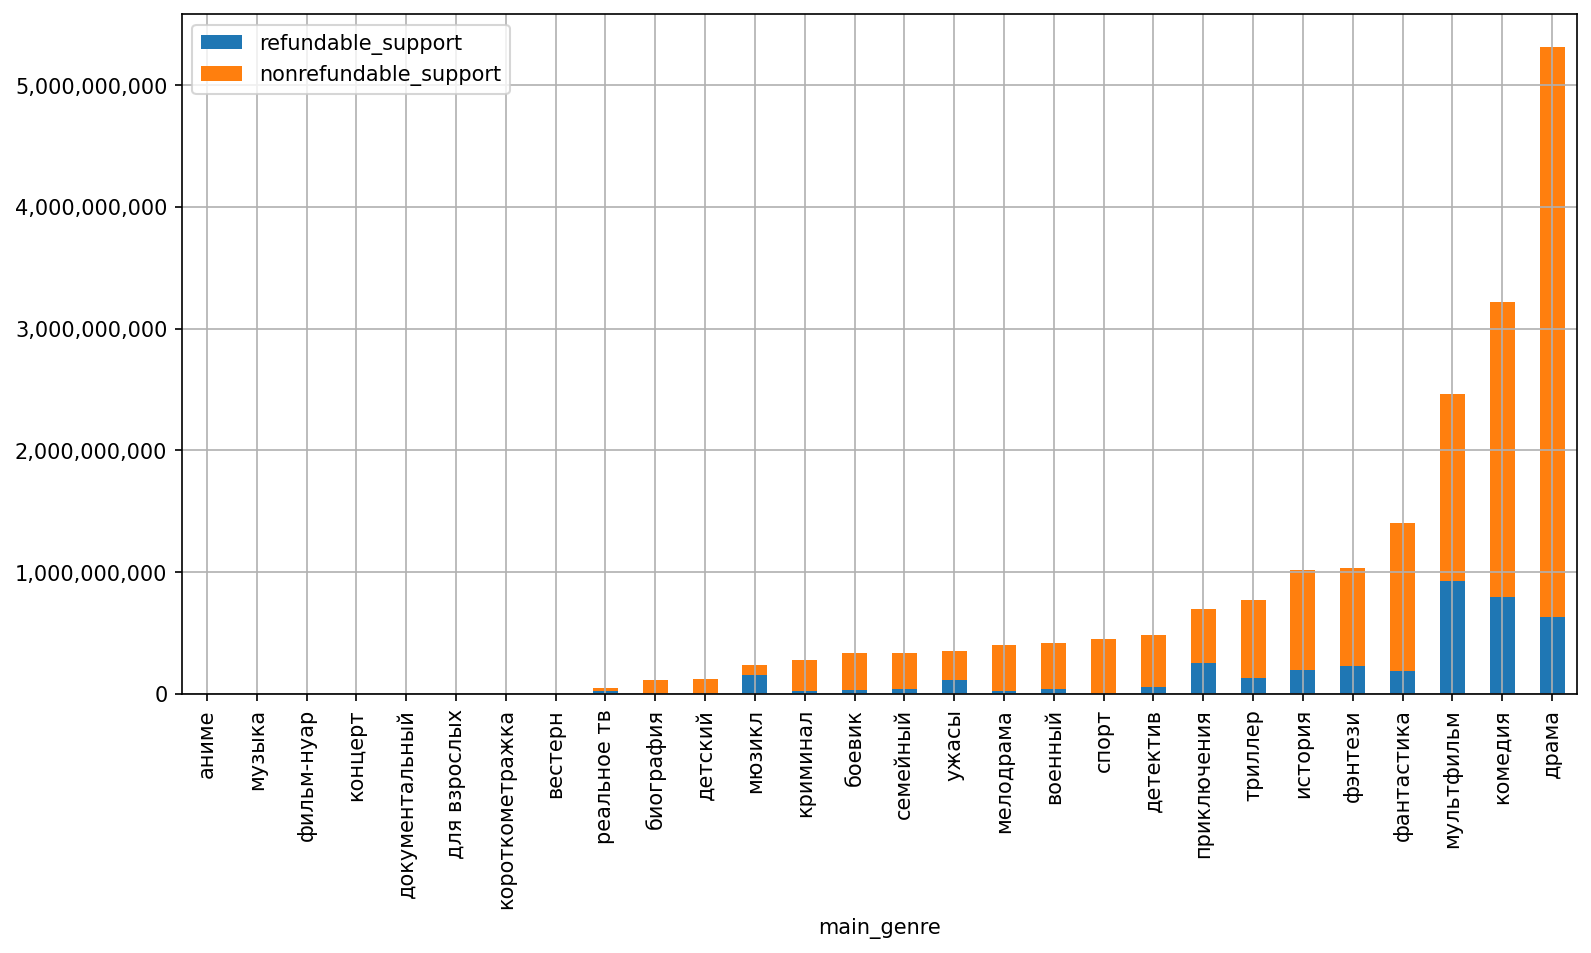

In [55]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)

df.groupby('main_genre').agg('sum').sort_values(by='budget_support').plot(
    kind='bar',
    grid=True, 
    figsize=(12, 6),
    stacked=True,
    y=['refundable_support', 'nonrefundable_support'],
    ax=ax
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))

Посмотрим как распределяется рейтинг между разными жанрами кино.

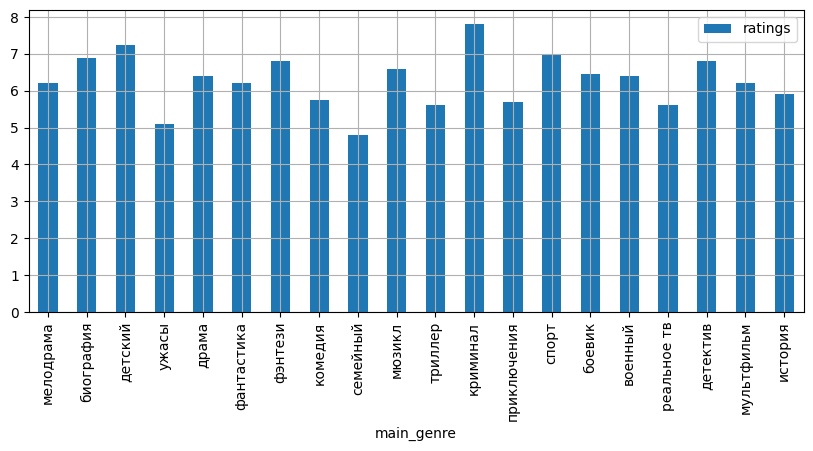

In [56]:
df_rai = df.query('refundable_support > 0 or nonrefundable_support > 0')

fig, ax = plt.subplots(figsize=(10,4), dpi=100)

df_rai.groupby('main_genre').agg('median').sort_values(by='budget_support').plot(
    kind='bar',
    grid=True, 
    figsize=(10, 4),
    stacked=True,
    y=['ratings'],
    ax=ax
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))


Наивысшая оценка рейтинга у фильмов с государственной поддержкой в жарнах: криминал, детский и спорт. Наименьшая оценка рейтинга у фильмов с государственной поддержкой в жарнах: семейный и ужасы.

<AxesSubplot:xlabel='main_genre'>

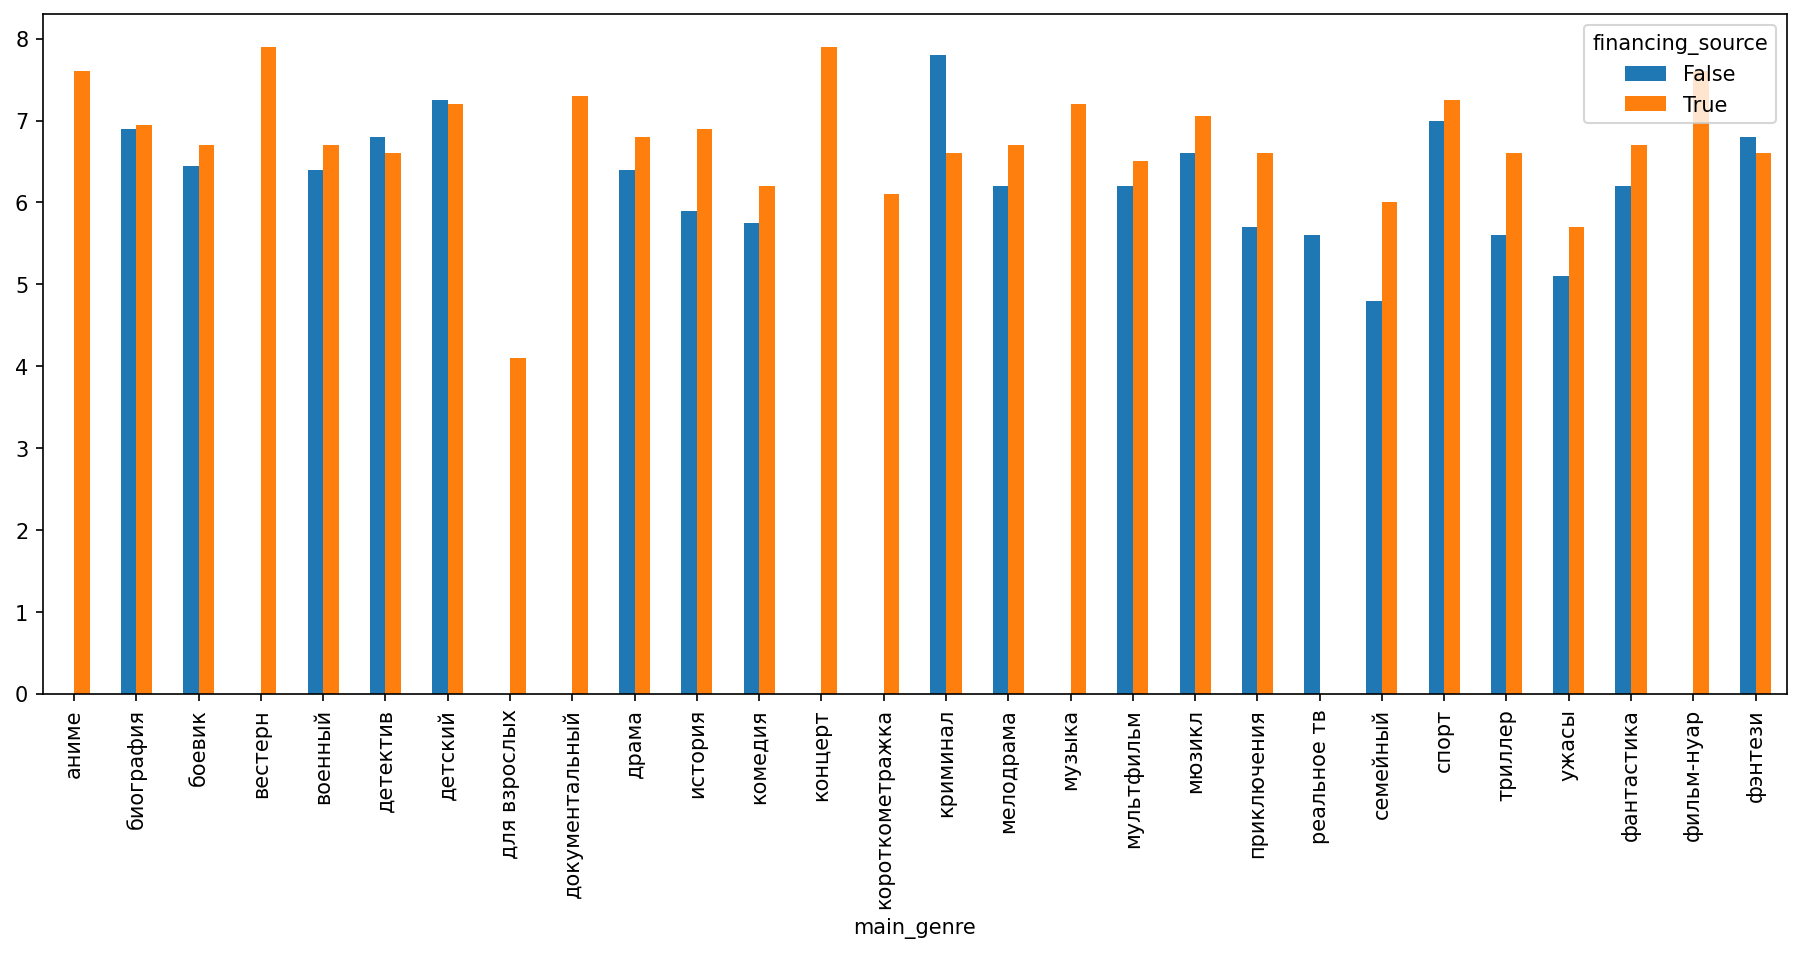

In [71]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
df.pivot_table(index='main_genre', columns=df['financing_source'].isna(), values='ratings', aggfunc='median').plot(kind='bar', ax=ax)


Посмотрим окупаемость фильмов.

<AxesSubplot:xlabel='main_genre'>

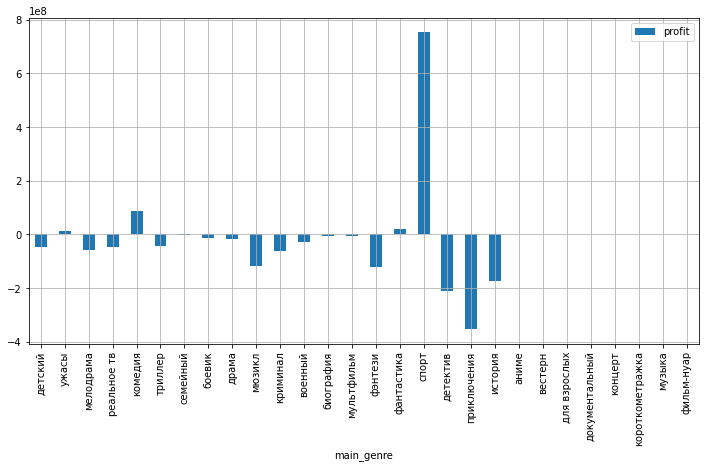

In [57]:
df['profit'] = df['box_office'] - df['budget']
# Столбец `profit` с информацией о прибыле фильма
df.groupby('main_genre').agg('mean').sort_values(by='budget').plot(
    kind='bar',
    grid=True, 
    figsize=(12, 6),
    stacked=True,
    y='profit',
)

In [74]:
df['payback_percent'] = df['box_office'] / df['budget']

# Вот самые окупившиеся фильмы (и неокупившиеся)

df.sort_values(by='payback_percent', ascending=False).iloc[[0,-1]]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,show_start_year,main_director,main_genre,gos_share,budget_support,profit,payback_percent
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,...,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,37.5,60000000.0,2.913569e+09,19.209804
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,...,6.3,"комедия,вестерн",NaN,2019,И.Трусов,комедия,NaN,NaN,NaN,NaN


Окупаются только фильмы в жанрах: спорт, фантастика, комедия и ужасы. Видимо всем и правда так не хватает эмоций, что хочется за кого-то поболеть, посмеяться, попугаться и нафантазировать себе прекрасный мир. Но это опять таки не точно 

### Шаг 5. Напишите общий вывод

Изучен рынок кинопроката фильмов.  
Проведена предобработка данных.  
Выявлена общая проблема в столбцах с категориальными значениями. Она связана с лишними знаками препинания и пробелами, разный регистр и сокращённые имена режисёров.  
Добавлены столбцы согласно ТЗ.  
В процессе анализа сделаны следующие выводы:  
Сумма сборов с годами растёт. Однако наблюдается спад сборов в 2018 и 2019 годах.  
С годами количество прокатов растёт. Исключением является спад в 2018 году.  
Медиана выглядит относительно ровной. Среднее значение резко растёт в 2013 году и достигает пика в 2017 году, а далее постепенно снижается. Отображённая разница в значениях средней и медианы скорее всего вызвана отсутствием информации о сборах по многим фильмам или наличием большого количества фильмов с небольшой суммой сборов.  
Наблюдаем влияние возрастного ограничения на кассовые сборы. Больше всех собирают фильмы с ограничением 16+,12+,6+. Меньше всех собирают фильмы с ограничениями 0+ и 18+.  
Фильмов с невозвратной поддержкой гораздо больше, чем с возвратной. Исключением являются мюзиклы, но их в целом не так много.  
Наивысшая оценка рейтинга у фильмов с государственной поддержкой в жарнах: криминал, детский и спорт. Наименьшая оценка рейтинга у фильмов с государственной поддержкой в жарнах: семейный и ужасы.  
Окупаются только фильмы в жанрах: спорт, фантастика, комедия и ужасы. Видимо всем и правда так не хватает эмоций, что хочется за кого-то поболеть, посмеяться, попугаться и нафантазировать себе прекрасный мир.